In [1]:
%matplotlib inline


# 音频鼓点提取

分为 5 个步骤:

- 计算频谱

- 计算频谱包络

- 根据包络线检测鼓点峰值时间点

- 将鼓点峰值时间点回溯 到 鼓点前一个局部最小值时间点

- 根据鼓点切分音频



需要 os/librosa/matplolib 库

In [2]:
from __future__ import print_function

import os

import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

librosa.load 加载音频

In [33]:
audio_path = 'drum.wav'
# code 1
y,sr=librosa.load(audio_path)

librosa.stft 计算频谱(可选),并绘制频谱图 (可选)

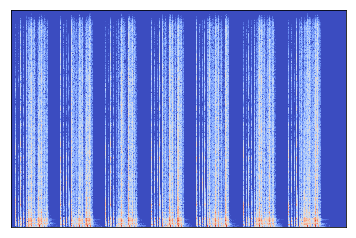

In [40]:
# code 2
D=librosa.stft(y)
db=librosa.core.amplitude_to_db(D)
librosa.display.specshow(db)
plt.show()

利用 librosa.onset.onset_strength 计算频谱包络, 绘制频谱包络图(可选)

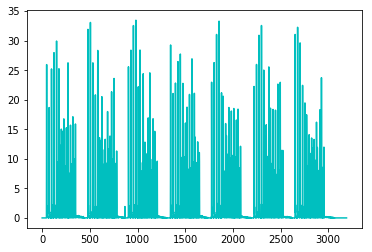

In [42]:
# code 3
energy=librosa.onset.onset_strength(y,sr)
# 绘制包络
plt.plot(librosa.onset.onset_strength(y,sr),color='c')
plt.show()

利用 librosa.onset.onset_detect根据频谱包络, 检测鼓点(以帧的形式保存)

In [43]:
# code 4
events=librosa.onset.onset_detect(y,sr)
print(events)
print(energy)

[  46   72   98  124  150  161  168  176  186  194  201  219  227  237
  245  253  262  271  280  289  296  306  315  322  332  341  348  480
  506  531  557  582  594  601  609  618  626  636  645  653  660  669
  677  685  703  711  720  728  738  747  754  764  772  781  905  931
  957  983 1008 1017 1026 1035 1044 1052 1060 1070 1078 1086 1095 1103
 1112 1121 1129 1139 1147 1155 1163 1173 1180 1190 1198 1206 1347 1372
 1398 1424 1449 1460 1467 1476 1486 1494 1503 1512 1519 1529 1537 1545
 1554 1563 1571 1580 1589 1596 1605 1615 1623 1631 1640 1648 1777 1803
 1829 1855 1880 1890 1897 1908 1916 1923 1932 1943 1950 1957 1968 1975
 1983 1994 2001 2009 2020 2028 2037 2046 2053 2063 2072 2080 2222 2248
 2274 2300 2323 2335 2342 2350 2361 2368 2377 2387 2394 2404 2413 2420
 2430 2438 2446 2456 2464 2472 2481 2489 2497 2506 2515 2524 2653 2679
 2705 2730 2756 2766 2773 2783 2792 2799 2808 2818 2826 2835 2844 2851
 2861 2870 2877 2886 2896 2903 2911 2921 2929 2938 2946 2955]
[0. 0. 0. ... 0

利用 librosa.onset.onset_backtrack 根据鼓点的峰值时间点, 往回查找峰起始帧

In [45]:
# code 5
frames=librosa.onset.onset_backtrack(events,energy)
print(frames)

[  45   71   97  122  149  157  166  172  183  192  199  217  223  234
  243  251  261  269  278  284  293  302  313  320  328  338  346  478
  504  527  556  580  590  599  608  615  623  634  643  651  657  665
  676  684  699  708  717  726  736  744  753  761  768  777  904  930
  956  979 1007 1016 1024 1033 1043 1050 1058 1067 1074 1084 1093 1102
 1110 1117 1126 1136 1146 1152 1161 1171 1177 1188 1194 1203 1345 1370
 1396 1423 1444 1457 1466 1474 1483 1490 1501 1507 1516 1524 1535 1544
 1552 1560 1567 1577 1586 1593 1603 1613 1621 1628 1636 1647 1775 1801
 1827 1854 1879 1885 1896 1902 1915 1920 1931 1938 1948 1954 1965 1972
 1981 1989 2000 2008 2017 2026 2035 2043 2050 2061 2070 2076 2220 2246
 2272 2299 2320 2331 2340 2349 2358 2366 2374 2383 2391 2402 2410 2419
 2426 2434 2442 2452 2461 2469 2479 2487 2494 2504 2513 2522 2651 2678
 2702 2729 2755 2764 2772 2778 2789 2797 2805 2815 2825 2833 2840 2848
 2859 2867 2874 2883 2893 2901 2910 2919 2925 2936 2945 2952]


利用 librosa.core.frames_to_samples(slice_frames) 将帧转化为样本点

In [63]:
# code 6
points=librosa.core.frames_to_samples(frames) 
print(points)

[  23040   36352   49664   62464   76288   80384   84992   88064   93696
   98304  101888  111104  114176  119808  124416  128512  133632  137728
  142336  145408  150016  154624  160256  163840  167936  173056  177152
  244736  258048  269824  284672  296960  302080  306688  311296  314880
  318976  324608  329216  333312  336384  340480  346112  350208  357888
  362496  367104  371712  376832  380928  385536  389632  393216  397824
  462848  476160  489472  501248  515584  520192  524288  528896  534016
  537600  541696  546304  549888  555008  559616  564224  568320  571904
  576512  581632  586752  589824  594432  599552  602624  608256  611328
  615936  688640  701440  714752  728576  739328  745984  750592  754688
  759296  762880  768512  771584  776192  780288  785920  790528  794624
  798720  802304  807424  812032  815616  820736  825856  829952  833536
  837632  843264  908800  922112  935424  949248  962048  965120  970752
  973824  980480  983040  988672  992256  997376 10

根据样本点, 切分原始音频
- 切分 y
- 根据样本点
- 利用 python 切片

In [76]:
if not os.path.exists('./Drum-Point-Cutting'):
    os.mkdir('./Drum-Point-Cutting')
num_points = len(y) # 音频总取样点数
num_slice_points = len(points) # 切片点数

for i in range(num_slice_points):
    # code 7
    librosa.core.frames_to_samples(frames)
    filepath='./Drum-Point-Cutting/drum'+str(i)+'.wav'
    if i==(num_slice_points-1):
        break
    librosa.output.write_wav(filepath,y[points[i]:points[i+1]],sr,norm=0)